In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns

# Data Pre-processing

In [ ]:
# upload data
from google.colab import files
uploaded = files.upload()

In [ ]:
# read in training data
train = pd.read_csv(io.BytesIO(uploaded['Constraint_English_Train - Sheet1.csv']))

In [ ]:
print(train[:10])

   id                                              tweet label
0   1  The CDC currently reports 99031 deaths. In gen...  real
1   2  States reported 1121 deaths a small rise from ...  real
2   3  Politically Correct Woman (Almost) Uses Pandem...  fake
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4   5  Populous states can generate large case counts...  real
5   6  Covid Act Now found "on average each person in...  real
6   7  If you tested positive for #COVID19 and have n...  real
7   8  Obama Calls Trump’s Coronavirus Response A Cha...  fake
8   9  ???Clearly, the Obama administration did not l...  fake
9  10  Retraction—Hydroxychloroquine or chloroquine w...  fake


In [ ]:
test = pd.read_csv(io.BytesIO(uploaded['english_test_with_labels - Sheet1.csv']))
validation = pd.read_csv(io.BytesIO(uploaded['Constraint_English_Val - Sheet1.csv']))

In [ ]:
print(test[:10])
print("----------------------")
print(validation[:10])

   id                                              tweet label
0   1  Our daily update is published. States reported...  real
1   2             Alfalfa is the only cure for COVID-19.  fake
2   3  President Trump Asked What He Would Do If He W...  fake
3   4  States reported 630 deaths. We are still seein...  real
4   5  This is the sixth time a global health emergen...  real
5   6  Low #vitaminD was an independent predictor of ...  real
6   7  A common question: why are the cumulative outc...  real
7   8  The government should consider bringing in any...  real
8   9  Our daily update is published. We’ve now track...  real
9  10  Breakdown of testing: 4 air crew 97 hotel &amp...  real
----------------------
   id                                              tweet label
0   1  Chinese converting to Islam after realising th...  fake
1   2  11 out of 13 people (from the Diamond Princess...  fake
2   3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3   4  Mike Pence in RNC speech 

In [ ]:
X_train = train[['tweet']]
print(X_train)

                                                  tweet
0     The CDC currently reports 99031 deaths. In gen...
1     States reported 1121 deaths a small rise from ...
2     Politically Correct Woman (Almost) Uses Pandem...
3     #IndiaFightsCorona: We have 1524 #COVID testin...
4     Populous states can generate large case counts...
...                                                 ...
6415  A tiger tested positive for COVID-19 please st...
6416  ???Autopsies prove that COVID-19 is??� a blood...
6417  _A post claims a COVID-19 vaccine has already ...
6418  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund
6419  It has been 93 days since the last case of COV...

[6420 rows x 1 columns]


In [ ]:
Y_train = train[['label']]
print(Y_train)

     label
0     real
1     real
2     fake
3     real
4     real
...    ...
6415  fake
6416  fake
6417  fake
6418  fake
6419  real

[6420 rows x 1 columns]


In [ ]:
X_test = test[['tweet']]
Y_test = test[['label']]
print(test)

                                                  tweet label
0     Our daily update is published. States reported...  real
1                Alfalfa is the only cure for COVID-19.  fake
2     President Trump Asked What He Would Do If He W...  fake
3     States reported 630 deaths. We are still seein...  real
4     This is the sixth time a global health emergen...  real
...                                                 ...   ...
2135  #CoronaVirusUpdates: State-wise details of Tot...  real
2136  Tonight 12(midnight) onwards Disaster Manageme...  fake
2137  296 new cases of #COVID19Nigeria; Plateau-85 E...  real
2138  RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...  real
2139  More than half of pregnant women recently admi...  real

[2140 rows x 2 columns]


In [ ]:

# tokenize each tweet
def tokenize(tweet):

  tokens = tweet.split(" ")
  tokens = [t.lower() for t in tokens]
  return tokens

train = train.loc[:, ['tweet', 'label']]
test = test.loc[:, ['tweet', 'label']]


In [ ]:
# create TaggedDocument object for training data
train_tagged_doc = train.apply(
    lambda r: TaggedDocument(words=tokenize(r['tweet']), tags=[r['label']]), axis=1)

In [ ]:
print(train_tagged_doc.values[0])

TaggedDocument(['the', 'cdc', 'currently', 'reports', '99031', 'deaths.', 'in', 'general', 'the', 'discrepancies', 'in', 'death', 'counts', 'between', 'different', 'sources', 'are', 'small', 'and', 'explicable.', 'the', 'death', 'toll', 'stands', 'at', 'roughly', '100000', 'people', 'today.'], ['real'])


In [ ]:
# create TaggedDocument object for test data
test_tagged_doc = test.apply(
    lambda r: TaggedDocument(words=tokenize(r['tweet']), tags=[r['label']]), axis=1)

#Distributed Bag of Words

In [ ]:
# distributed bag of words model
# for our blog post explain more about what dbow is and how doc2vec is similar to word2vec
dbow = Doc2Vec(vector_size=100, dm=0, negative=5, min_count=1, batch_words=100)
dbow.build_vocab(train_tagged_doc)

In [ ]:
# train the model

epochs = 50

for epoch in range(epochs):

  dbow.train(train_tagged_doc, total_examples=len(train_tagged_doc.values), epochs=1)
  dbow.alpha -= 0.00025
  dbow.min_alpha = dbow.alpha

  print(f'epoch {epoch}')

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


In [ ]:
def get_vectors(model, tagged_doc):

  sentences = tagged_doc.values
  y, x = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sentences])
  # zip takes two lists and makes them into one list of tuples
  # in this case zip with asterisk takes the list of tuples and separates them into y and x
  # doc.tags[0] is our y
  print(y)
  return y, x
# turning to document into 100 dimensional vector which is reducing dimensionality but holds a lot of information

In [ ]:
# The output should be real/fake
sentences = train_tagged_doc.values
sentences[0].tags[0]

'real'

In [ ]:
# extract vectors from model
y_train, x_train = get_vectors(dbow, train_tagged_doc)
y_test, x_test = get_vectors(dbow, test_tagged_doc)

('real', 'real', 'fake', 'real', 'real', 'real', 'real', 'fake', 'fake', 'fake', 'real', 'fake', 'real', 'real', 'real', 'real', 'fake', 'real', 'real', 'fake', 'fake', 'real', 'fake', 'real', 'real', 'fake', 'fake', 'real', 'real', 'real', 'fake', 'fake', 'real', 'fake', 'fake', 'fake', 'real', 'fake', 'real', 'fake', 'real', 'fake', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'fake', 'real', 'real', 'fake', 'real', 'fake', 'fake', 'fake', 'fake', 'real', 'fake', 'real', 'real', 'fake', 'real', 'fake', 'fake', 'real', 'fake', 'real', 'fake', 'real', 'real', 'real', 'real', 'fake', 'fake', 'real', 'fake', 'real', 'fake', 'real', 'fake', 'real', 'fake', 'fake', 'real', 'real', 'real', 'real', 'real', 'fake', 'real', 'fake', 'real', 'real', 'real', 'real', 'real', 'fake', 'real', 'fake', 'fake', 'fake', 'real', 'real', 'fake', 'real', 'real', 'fake', 'real', 'fake', 'fake', 'real', 'real', 'real', 'real', 'real', 'fake', 'fake', 'real', 'real', 'real', 'real', 'real', 'real',

In [ ]:
# y_train should be real or fake and x_train should be a vector size 100
print(y_train[0])
print(x_train[0])

real
[ 0.5496088  -0.37476677 -0.12455493  0.49638444  0.0647711   0.22687419
  0.25350818 -0.6482158  -0.33491296 -0.08155819 -0.00760147  0.21468252
  0.13358405  0.20096436  0.32171768 -0.3441409  -0.2728828   0.16331227
 -0.103473   -0.0411621   0.00567137  0.3809024  -0.64235365 -0.03007914
 -0.00256869 -0.29949686  0.04590116 -0.27954105 -0.28795555  0.45081475
  0.32778957 -0.33746016 -0.20867851 -0.2686632  -0.24591675 -0.14455777
 -0.02466039  0.19582294  0.04241062  0.09427867 -0.4157223  -0.09101926
 -0.04115069  0.02965735 -0.11276344  0.21181253 -0.32980418 -0.1491431
  0.06175785  0.3307161   0.21516114 -0.10691631  0.41946214  0.17380163
 -0.00519485  0.2306875  -0.01005297 -0.2271449   0.13151233 -0.006211
 -0.3659322  -0.40040335  0.1101433  -0.08531059  0.13500874 -0.22913826
 -0.32959583  0.2605353   0.12468738  0.22706442  0.00895212 -0.39239907
  0.3562795  -0.19166107 -0.10935333  0.27255568 -0.6559101  -0.15072873
 -0.2927904  -0.10149404 -0.3662377  -0.13828792 

#Logistic Regression

In [ ]:
clf = LogisticRegression() # instantiates the model...model object we can now fit...fit method is now what we will apply to our trainign data
clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
clf.score(x_test, y_test)

0.927570093457944

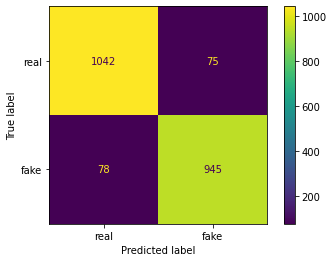

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_pred, y_test, labels=['real', 'fake'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['real', 'fake'])
disp.plot()
plt.show()

- rank articles by fakeness
- show the articles with highest predicted fakeness but is actually real
- for blog post: explaining all the code, explaining Doc2Vec which includes explaining Word2Vec, explain what the neural network does in Doc2Vec

In [ ]:
probabilities = clf.predict_proba(x_test)

# probability that tweet is labeled as 0 (fake? or real?)
test['p0'] = probabilities[:,0]
test = test.sort_values('p0')
print(test)


                                                  tweet label            p0
432   As at 9:30pm 11th April there are 318 confirme...  real  2.078338e-13
1429  As at 11:15am 5th April there are 224 confirme...  real  1.499467e-12
84    As at 08:00 pm 31st March there are 139 confir...  real  1.658673e-12
1123  As at 09:30 pm 5th April there are 232 confirm...  real  2.685629e-12
741   As at 8:35 pm 26th March there are 65 confirme...  real  2.832756e-11
...                                                 ...   ...           ...
1529  Claim: Kins of those who died of COVID-19 can ...  fake  1.000000e+00
1996  Claim: Kins of those who died of COVID-19 can ...  fake  1.000000e+00
257   @realDonaldTrump I, too, am widow of distingui...  fake  1.000000e+00
535   Gale of the wind" and "Neem Tree" leaves are g...  fake  1.000000e+00
23    President Donald Trump tweeted, "Coronavirus v...  fake  1.000000e+00

[2140 rows x 3 columns]


In [ ]:
def print_tweets(subset):

  for ind in subset.index:

    print(subset['tweet'][ind])
    print(subset['label'][ind])
    print('\n')

In [ ]:
# examine tweets
most_real = test.iloc[:5]
most_fake = test.iloc[-5:]
most_confused = test.iloc[1113:1118]

print("Most Real---------------------------------------------")
print_tweets(most_real)
print("Most Fake---------------------------------------------")
print_tweets(most_fake)
print("Most Confused-----------------------------------------")
print_tweets(most_confused)


Most Real---------------------------------------------
As at 9:30pm 11th April there are 318 confirmed cases 70 discharged 10 deaths Lagos- 174 FCT- 56 Osun- 20 Edo- 12 Oyo- 11 Ogun- 7 Bauchi- 6 Kaduna- 6 Akwa Ibom- 5 Katsina-4 Delta- 3 Enugu- 2 Ekiti- 2 Rivers-2 Kwara- 2 Ondo- 2 Benue- 1 Niger- 1 Anambra- 1 Kano-1
real


As at 11:15am 5th April there are 224 confirmed cases 27 discharged 5 deaths For a breakdown of cases by states- https://t.co/zQrpNeOfet Lagos- 115 FCT- 45 Osun- 20 Oyo- 9 Akwa Ibom- 5 Ogun- 4 Edo- 9 Kaduna- 4 Bauchi- 6 Enugu- 2 Ekiti- 2 Rivers-1 Benue- 1 Ondo- 1
real


As at 08:00 pm 31st March there are 139 confirmed cases 9 discharged 2 deaths For a breakdown of cases by states in real time visit https://t.co/zQrpNeOfet Currently; Lagos- 82 FCT- 28 Oyo- 8 Osun- 5 Ogun- 4 Kaduna- 3 Enugu- 2 Edo- 2 Bauchi- 2 Ekoti- 1 Rivers-1 Benue- 1
real


As at 09:30 pm 5th April there are 232 confirmed cases 33 discharged 5 deaths For a breakdown of cases by state- https://t.co/z

#Visualizing Document Vectors in 2 dimensions

In [ ]:
#
#  tsne.py
#
# Implementation of t-SNE in Python. The implementation was tested on Python
# 2.7.10, and it requires a working installation of NumPy. The implementation
# comes with an example on the MNIST dataset. In order to plot the
# results of this example, a working installation of matplotlib is required.
#
# The example can be run by executing: `ipython tsne.py`
#
#
#  Created by Laurens van der Maaten on 20-12-08.
#  Copyright (c) 2008 Tilburg University. All rights reserved.

import numpy as np
import pylab


def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    return H, P


def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    return P


def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y


def tsne(X=np.array([]), no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = pca(X, initial_dims).real
    (n, d) = X.shape
    max_iter = 1000
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)

    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = np.sum(P * np.log(P / Q))
            print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            P = P / 4.

    # Return solution
    return Y



In [ ]:
# tsne plot
x_test = np.asarray(x_test)
# print(x_test[:10])
reduced_dim = tsne(x_test)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2140...
Computing P-values for point 500 of 2140...
Computing P-values for point 1000 of 2140...
Computing P-values for point 1500 of 2140...
Computing P-values for point 2000 of 2140...
Mean value of sigma: 0.193472
Iteration 10: error is 21.175377
Iteration 20: error is 18.738121
Iteration 30: error is 16.911135
Iteration 40: error is 16.576895
Iteration 50: error is 16.655494
Iteration 60: error is 16.725946
Iteration 70: error is 16.743041
Iteration 80: error is 16.749524
Iteration 90: error is 16.750258
Iteration 100: error is 16.749094
Iteration 110: error is 2.438696
Iteration 120: error is 2.095205
Iteration 130: error is 1.928008
Iteration 140: error is 1.827584
Iteration 150: error is 1.757872
Iteration 160: error is 1.706023
Iteration 170: error is 1.665729
Iteration 180: error is 1.633006
Iteration 190: error is 1.606188
Iteration 200: error is 1.583947
Iteration 210: error

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


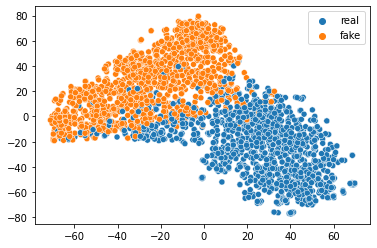

In [ ]:
dim1 = reduced_dim[:, 0]
dim2 = reduced_dim[:, 1]

sns.scatterplot(dim1, dim2, hue=y_test)
plt.show()

#Keras Neural Network

In [ ]:
# 100 dense layer instead of logistic classifier
import tensorflow.keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.regularizers import L2
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(100,  input_dim= 100, activation='sigmoid', kernel_regularizer=L2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd',
              loss=tensorflow.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 100)               10100     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_38 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,201
Trainable params: 10,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = pd.DataFrame(x_train)

# cast real/fake as 0/1 respectively
class_map = {'real':0, 'fake':1}
y_train = pd.DataFrame(y_train)
y_train = y_train[0].map(class_map)

         0
0     real
1     real
2     fake
3     real
4     real
...    ...
6415  fake
6416  fake
6417  fake
6418  fake
6419  real

[6420 rows x 1 columns]
0       0
1       0
2       1
3       0
4       0
       ..
6415    1
6416    1
6417    1
6418    1
6419    0
Name: 0, Length: 6420, dtype: int64
0      -0.418790
1      -0.248824
2      -0.578370
3      -0.112115
4      -0.134405
          ...   
6415   -0.408396
6416   -0.763753
6417   -0.457113
6418   -0.455084
6419   -0.702622
Name: 0, Length: 6420, dtype: float32


In [ ]:
H = model.fit(x_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
51/51 [==============================] - 1s 3ms/step - loss: 1.7335 - accuracy: 0.5188
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 1.6445 - accuracy: 0.6036
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 1.6194 - accuracy: 0.6246
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 1.5884 - accuracy: 0.6600
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 1.5626 - accuracy: 0.6755
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 1.5352 - accuracy: 0.6984
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 1.5082 - accuracy: 0.7302
Epoch 8/50
51/51 [==============================] - 0s 3ms/step - loss: 1.4848 - accuracy: 0.7417
Epoch 9/50
51/51 [==============================] - 0s 3ms/step - loss: 1.4570 - accuracy: 0.7650
Epoch 10/50
51/51 [==============================] - 0s 3ms/step - loss: 1.4320 - accuracy: 0.7745
Epoch 11/50
51/51 [

In [ ]:
x_test = pd.DataFrame(x_test)

# cast real/fake as 0/1 respectively
class_map = {'real':0, 'fake':1}
y_test = pd.DataFrame(y_test)
y_test = y_test[0].map(class_map)

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=100)
print(score[0])
print(score[1])

22/22 [==============================] - 0s 2ms/step - loss: 0.7738 - accuracy: 0.9271
0.7737709879875183
0.92710280418396


#Distributed Memory

In [ ]:
# Distributed Memory model
dm = Doc2Vec(vector_size=100, dm=1, negative=5, min_count=1, batch_words=100)
dm.build_vocab(train_tagged_doc)

In [ ]:
epochs = 30

for epoch in range(epochs):

  dm.train(train_tagged_doc, total_examples=len(train_tagged_doc.values), epochs=1)
  dm.alpha -= 0.00025
  dm.min_alpha = dm.alpha

  print(f'epoch {epoch}')

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29


In [ ]:
# extract vectors from model
y_train, x_train = get_vectors(dm, train_tagged_doc)
y_test, x_test = get_vectors(dm, test_tagged_doc)

('real', 'real', 'fake', 'real', 'real', 'real', 'real', 'fake', 'fake', 'fake', 'real', 'fake', 'real', 'real', 'real', 'real', 'fake', 'real', 'real', 'fake', 'fake', 'real', 'fake', 'real', 'real', 'fake', 'fake', 'real', 'real', 'real', 'fake', 'fake', 'real', 'fake', 'fake', 'fake', 'real', 'fake', 'real', 'fake', 'real', 'fake', 'real', 'real', 'real', 'real', 'real', 'real', 'real', 'fake', 'real', 'real', 'fake', 'real', 'fake', 'fake', 'fake', 'fake', 'real', 'fake', 'real', 'real', 'fake', 'real', 'fake', 'fake', 'real', 'fake', 'real', 'fake', 'real', 'real', 'real', 'real', 'fake', 'fake', 'real', 'fake', 'real', 'fake', 'real', 'fake', 'real', 'fake', 'fake', 'real', 'real', 'real', 'real', 'real', 'fake', 'real', 'fake', 'real', 'real', 'real', 'real', 'real', 'fake', 'real', 'fake', 'fake', 'fake', 'real', 'real', 'fake', 'real', 'real', 'fake', 'real', 'fake', 'fake', 'real', 'real', 'real', 'real', 'real', 'fake', 'fake', 'real', 'real', 'real', 'real', 'real', 'real',

In [ ]:
# instantiates the model...model object we can now fit...fit method is now what we will apply to our training data
clf2 = LogisticRegression() 
clf2.fit(x_train, y_train)
clf2.score(x_test, y_test)

0.8761682242990654

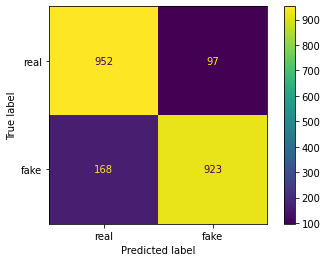

In [ ]:
# predict labels for test data and plot in confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf2.predict(x_test)
cm = confusion_matrix(y_pred, y_test, labels=['real', 'fake'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['real', 'fake'])
disp.plot()
plt.show()

Interesting that this model incorrectly labels fake tweets as real more than the other model.

In [ ]:
# tsne plot
x_test = np.asarray(x_test)
reduced_dim = tsne(x_test)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2140...
Computing P-values for point 500 of 2140...
Computing P-values for point 1000 of 2140...
Computing P-values for point 1500 of 2140...
Computing P-values for point 2000 of 2140...
Mean value of sigma: 0.562998
Iteration 10: error is 20.254059
Iteration 20: error is 19.137197
Iteration 30: error is 18.849101
Iteration 40: error is 18.996928
Iteration 50: error is 18.960042
Iteration 60: error is 18.948293
Iteration 70: error is 18.957542
Iteration 80: error is 18.957321
Iteration 90: error is 18.955910
Iteration 100: error is 18.955762
Iteration 110: error is 3.081742
Iteration 120: error is 2.636960
Iteration 130: error is 2.473398
Iteration 140: error is 2.395462
Iteration 150: error is 2.344684
Iteration 160: error is 2.306646
Iteration 170: error is 2.276641
Iteration 180: error is 2.252412
Iteration 190: error is 2.232007
Iteration 200: error is 2.215074
Iteration 210: error

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


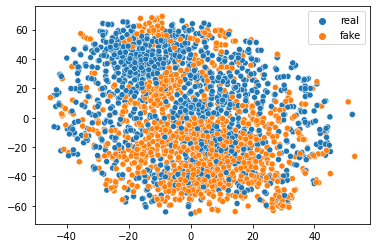

In [ ]:
# plot document vectors in 2D
dim1 = reduced_dim[:, 0]
dim2 = reduced_dim[:, 1]

sns.scatterplot(dim1, dim2, hue=y_test)
plt.show()